In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lib.features as features
import lib.breeds as breeds
import lib.plots as plots

In [2]:
data_folder = '../data/csv/'
files = '10101.smo.csv'

In [3]:
def add_times(df) -> pd.DataFrame:
    """
    Add times to the dataframe.
    Args:
        df: numpy array of shape (N, D).
    Returns:
        data: numpy array of shape (N, D+2).
    """
    df1 = df.copy()
    df1["time"] = df1.index
    df1["day"] = df1["time"] // 21600
    return df1

In [4]:
df = features.load_features(data_folder + files)
df = features.add_times(df)

def to_hours(tick):
    return tick / 900.0

df['hours'] = df.index.map(to_hours)

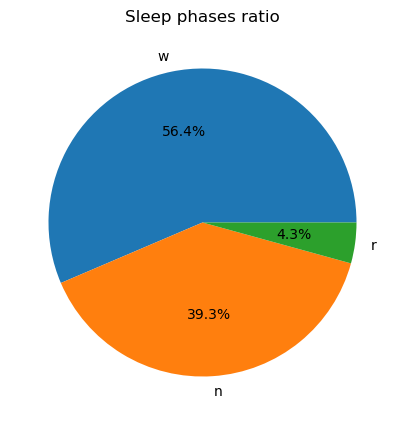

In [5]:
data_files = [mice + ".smo.csv" for mice in breeds.mice_breeds["c57bl6"]][:]
df1 = pd.DataFrame()
for file in data_files:
    pd.concat([df1, features.load_features(data_folder + file)])
    
sleep_phases = df['state'].value_counts()

# get total number of sleep phases
total_sleep_phases = sleep_phases.sum()

# get ratio of sleep phases
sleep_phases_ratio = sleep_phases / total_sleep_phases

# plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sleep_phases_ratio, labels=sleep_phases_ratio.index, autopct='%1.1f%%')
plt.title('Sleep phases ratio')
plt.show()

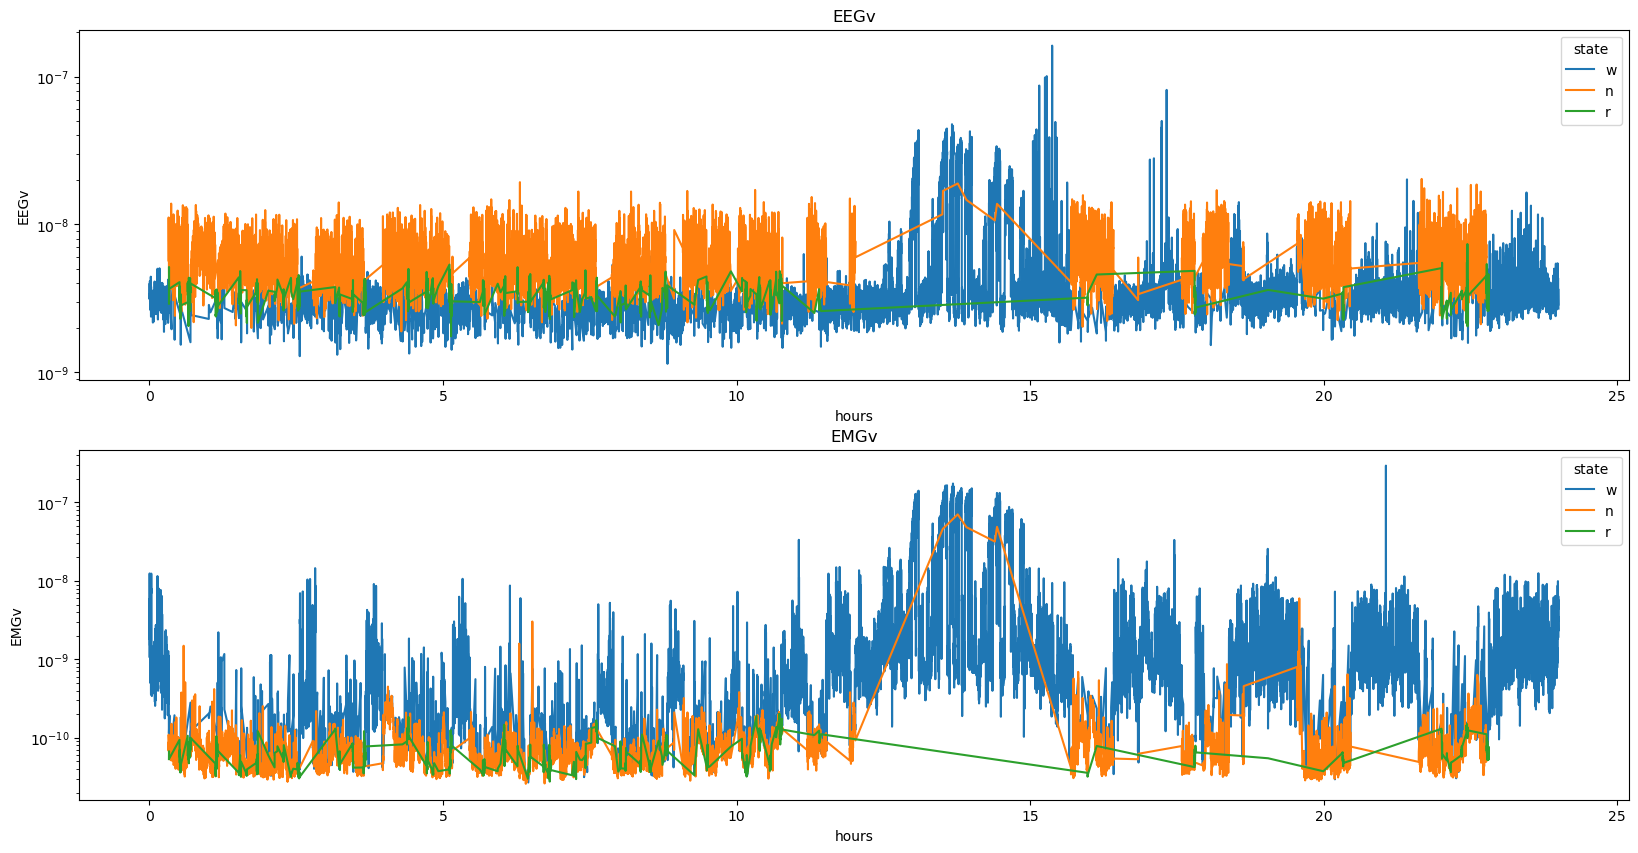

In [6]:
plots.plot_df(data=df, day=0, log=True)

<AxesSubplot: xlabel='EEGv', ylabel='EMGv'>

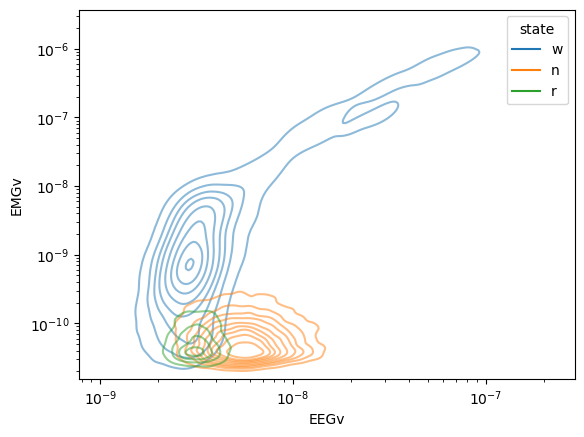

In [8]:
sns.kdeplot(data=df, x="EEGv", y="EMGv", hue="state", fill=False, log_scale=True, alpha=.50)

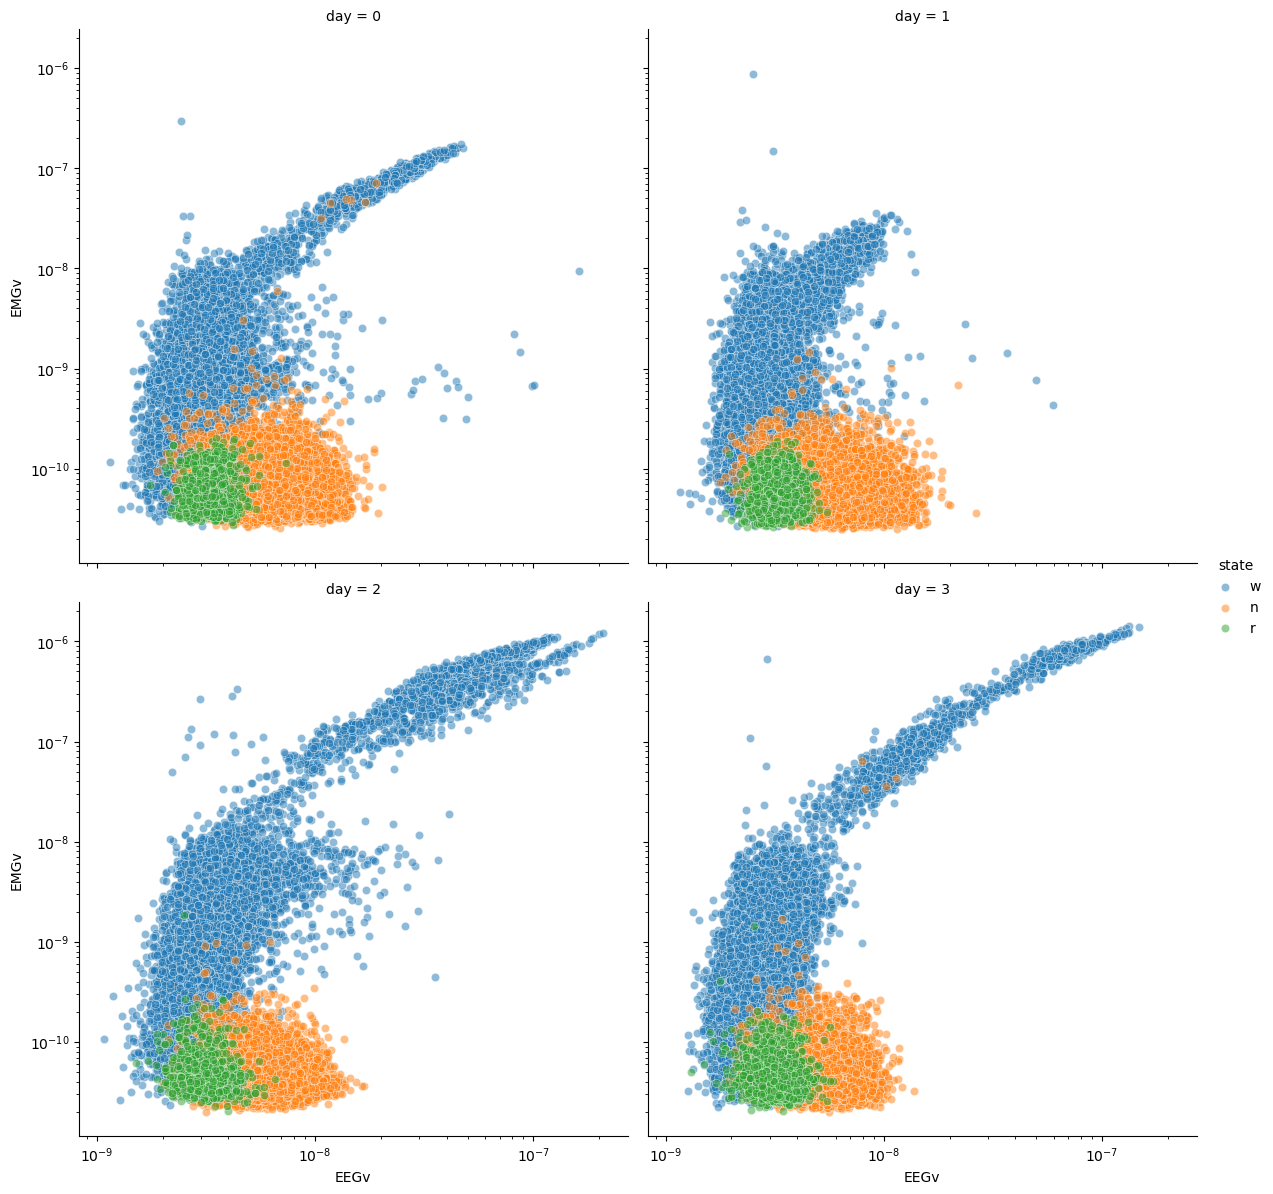

In [7]:
plots.scatter(data=df)

<Figure size 3840x2880 with 0 Axes>

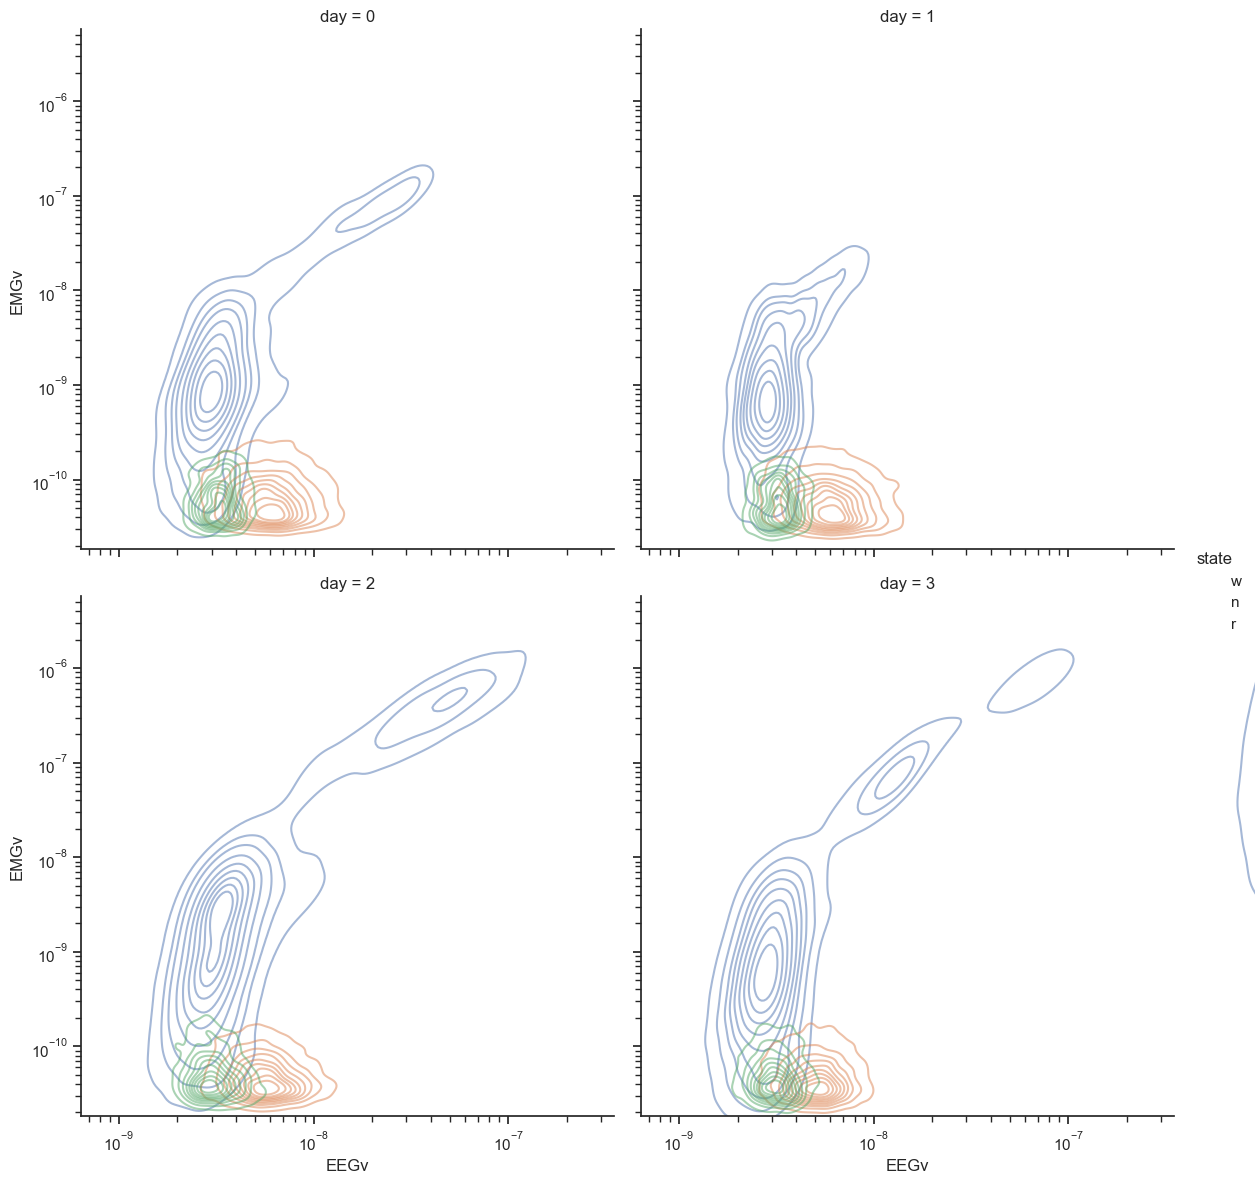

In [9]:
dfs = pd.DataFrame()

for file in ["10101.smo.csv"]:
    data = pd.read_csv(data_folder + file)

    dfs = pd.concat([dfs, data], ignore_index=True)

dfs = features.add_times(dfs)
plots.density(dfs)